In [50]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [51]:
from langchain_openai import ChatOpenAI

In [52]:
model = ChatOpenAI(model="gpt-4o-mini")

In [53]:
from langchain_core.messages import HumanMessage, AIMessage

In [54]:
model.invoke([
    HumanMessage(content="I am Naji ")
])

AIMessage(content='Hello, Naji! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 12, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-0223d5bb-75e2-42fc-843b-5a90b3967cd9-0', usage_metadata={'input_tokens': 12, 'output_tokens': 12, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [55]:
model.invoke([
    HumanMessage(content="What is my Name ")
])

AIMessage(content="I'm sorry, but I don't know your name. If you tell me, I can use it in our conversation!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 12, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-ac913665-9a27-4d65-b48e-8f3ffd00484c-0', usage_metadata={'input_tokens': 12, 'output_tokens': 23, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [56]:
model.invoke([
    HumanMessage(content="I am Naji "),
    AIMessage(content="Hello, Naji! How can I assist you today"),
    HumanMessage(content="What is my Name ")

])

AIMessage(content='Your name is Naji. How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 36, 'total_tokens': 49, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-417e439c-4bc8-4e28-af93-d740f10a67cc-0', usage_metadata={'input_tokens': 36, 'output_tokens': 13, 'total_tokens': 49, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [57]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.checkpoint.memory import  MemorySaver

In [58]:
workflow = StateGraph(state_schema=MessagesState)

In [59]:
def call_model(state: MessagesState):
    respose = model.invoke(state["messages"])
    return {"messages": respose}

In [60]:
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")
workflow.add_edge("model", END)

In [61]:
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [69]:
config = {"configurable": {"thread_id": "abc123"}}

In [63]:
query = " I am Naji"
input_message = [HumanMessage(query)]
output = app.invoke({"messages": input_message}, config)

In [65]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Hello, Naji! How can I assist you today?


In [66]:
query = "What is my name"
input_message = [HumanMessage(query)]
output = app.invoke({"messages": input_message}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Your name is Naji. How can I help you today?


In [67]:
config = {"configurable": {"thread_id": "abc124"}}
query = "What is my name"
input_message = [HumanMessage(query)]
output = app.invoke({"messages": input_message}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

I'm sorry, but I don't have access to personal information about users unless you provide it during the conversation. What would you like me to call you?


In [71]:
for mem in memory.list(config):
    print(mem)

CheckpointTuple(config={'configurable': {'thread_id': 'abc123', 'checkpoint_ns': '', 'checkpoint_id': '1efb209e-cba9-6d5e-8004-e24e9de3cf44'}}, checkpoint={'v': 1, 'ts': '2024-12-04T06:35:16.787676+00:00', 'id': '1efb209e-cba9-6d5e-8004-e24e9de3cf44', 'channel_values': {'messages': [HumanMessage(content=' I am Naji', additional_kwargs={}, response_metadata={}, id='7ec7d1f8-b9bb-4c22-8521-230db89443e0'), AIMessage(content='Hello, Naji! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 11, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_3de1288069', 'finish_reason': 'stop', 'logprobs': None}, id='run-5614411b-e501-4046-8df9-e6d7681ed0be-0', usage_metadata=

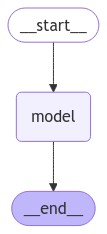

In [72]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))